In [1]:
import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
%matplotlib inline

In [4]:
cd CampFire

/home/jovyan/Fires/TIFF_Files/CampFire


In [5]:
practice = io.imread('GOES-17_ABI_RadC_C14_20181116_180619_cali.tif')

In [6]:
type(practice)

numpy.ndarray

In [7]:
practice.min(), practice.max()

(53, 255)

In [8]:
practice.shape

(556, 541, 2)

In [9]:
practice.dtype

dtype('uint8')

In [10]:
firstChannel = np.squeeze(practice[:,:,0])

In [11]:
secondChannel = np.squeeze(practice[:,:,1])

In [12]:
newimage = firstChannel[125:250,300:450]

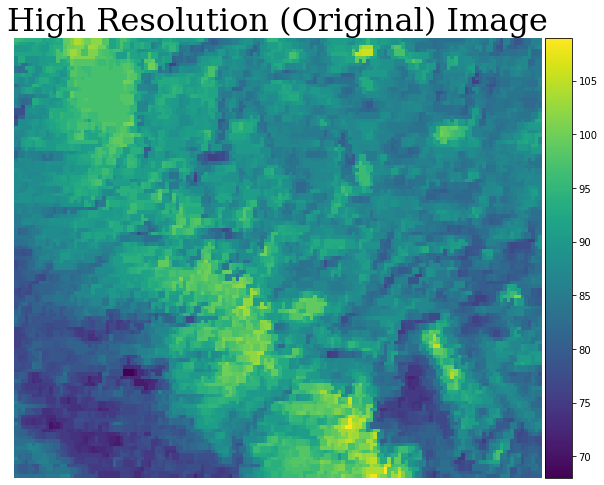

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(newimage,interpolation='nearest')
ax.set_title('High Resolution (Original) Image',fontsize = 32,fontname = 'serif')
ax.axis('off')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [15]:
height, width = newimage.shape
print("height: ", height, "width: ", width, "type: ", type(firstChannel))

height:  125 width:  150 type:  <class 'numpy.ndarray'>


In [16]:
smallChannel = resize(newimage, (round(height/2), round(width/2)))*255

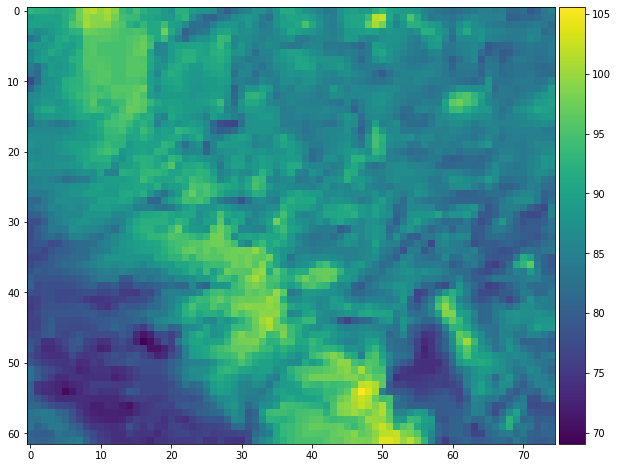

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(smallChannel,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [18]:
blurryChannel = resize(smallChannel, (height, width))

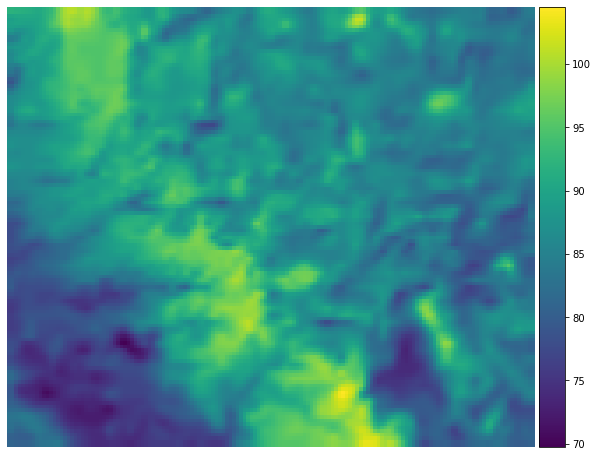

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(blurryChannel,interpolation='nearest')
#ax.set_title('Low Resolution Image',fontsize = 32,fontname = 'serif')
ax.axis('off')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [48]:
details = firstChannel - blurryChannel

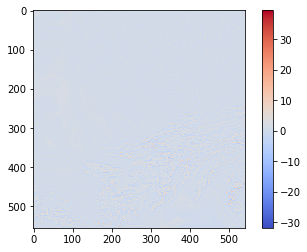

In [49]:
fig, ax = plt.subplots(1,1)
im=ax.imshow(details,cmap=plt.get_cmap('coolwarm'))
fig.colorbar(im)

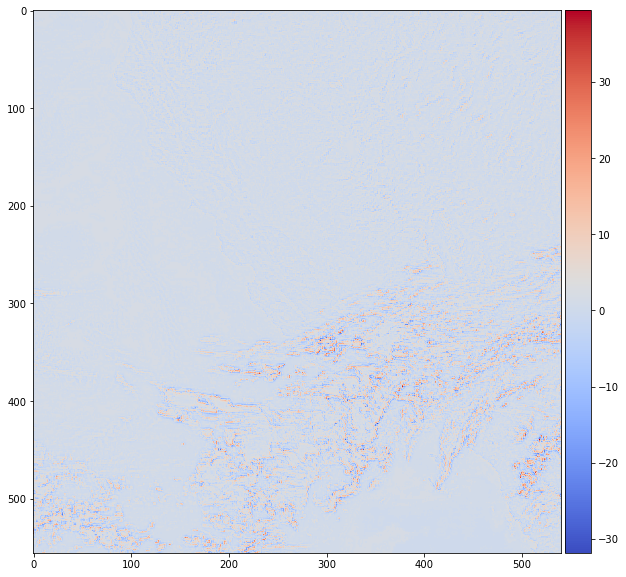

In [50]:

fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(details,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)


In [22]:
laplace_edges = laplace(blurryChannel)

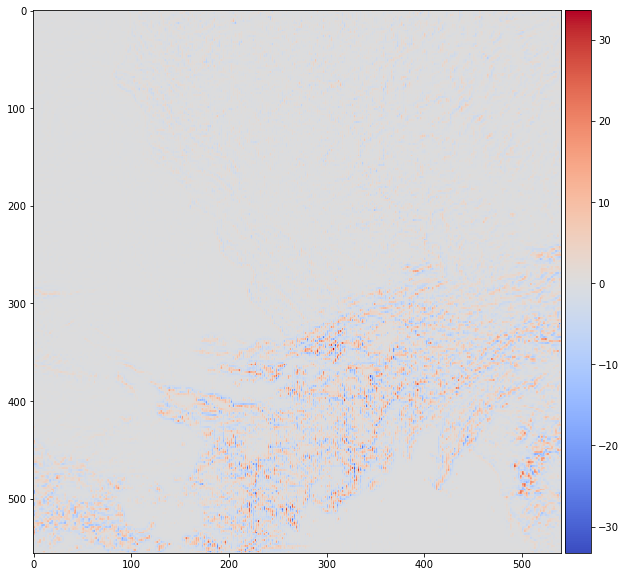

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(laplace_edges,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

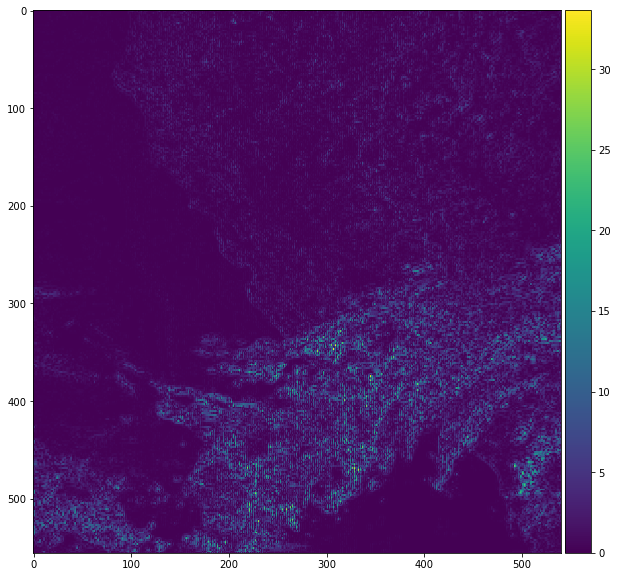

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs(laplace_edges),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

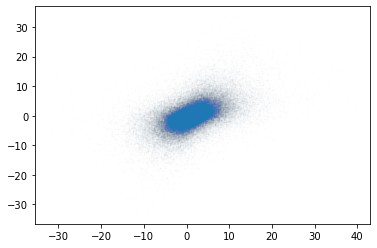

In [54]:
fig, ax = plt.subplots(1,1)
im=ax.scatter(details,laplace_edges, alpha=0.01,s=0.5)

In [23]:
sharped_image = blurryChannel+laplace_edges*.6

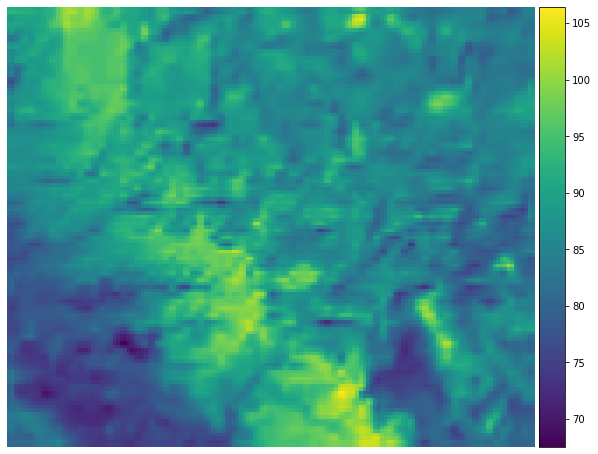

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(sharped_image,interpolation='nearest')
#ax.set_title('Sharpened Image Using Laplace',fontsize = 32,fontname = 'serif')
ax.axis('off')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [57]:
abs_error = abs(firstChannel-sharped_image)

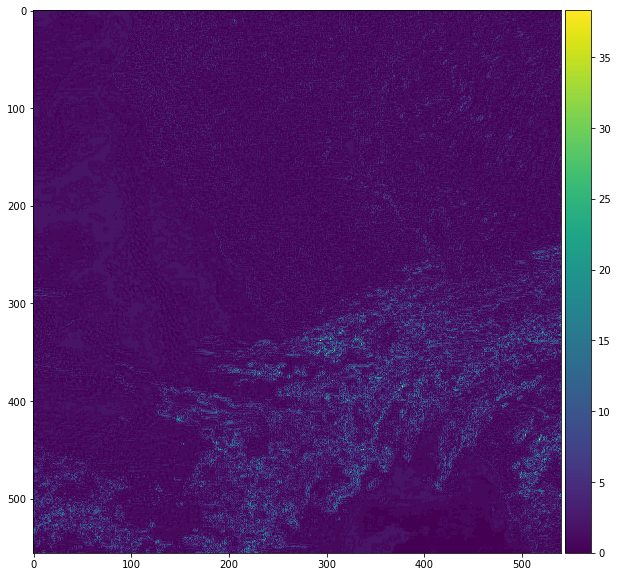

In [58]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs_error,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [59]:
abs_error.max(), abs_error.mean(), abs_error.std()

(38.32257941398376, 1.8219686054233253, 2.0070755011477552)

In [60]:
abs(details- laplace_edges).max(), abs(details- laplace_edges).mean()

(43.714504603962354, 1.934806242204294)

In [61]:
np.sqrt(((details- laplace_edges)**2).mean())

2.9198319321286603